### Load dataset

In [1]:
df<- read.csv("https://tinyurl.com/UNpckpdata")

### Display data set

In [2]:
head(df)

ï..Contribution_ID,ISOCode3,M49_Code,Contributing_Country,Mission_Acronym,Personnel_Type,Female_Personnel,Male_Personnel,Last_Reporting_Date
427903,DZA,12,Algeria,MONUSCO,Experts on Mission,0,2,31/07/2020
427904,ARG,32,Argentina,MINURSO,Experts on Mission,0,2,31/07/2020
427905,ARG,32,Argentina,UNFICYP,Troops,15,219,31/07/2020
427906,ARG,32,Argentina,UNFICYP,Staff Officer,3,6,31/07/2020
427907,ARG,32,Argentina,UNMISS,Individual Police,1,5,31/07/2020
427908,ARG,32,Argentina,UNTSO,Experts on Mission,0,4,31/07/2020


### Check each column for missing values and/or NAs and drop the observations that have them.

In [3]:
df = replace(df, df == "", NA)
df = na.omit(df)
head(df)

ï..Contribution_ID,ISOCode3,M49_Code,Contributing_Country,Mission_Acronym,Personnel_Type,Female_Personnel,Male_Personnel,Last_Reporting_Date
427903,DZA,12,Algeria,MONUSCO,Experts on Mission,0,2,31/07/2020
427904,ARG,32,Argentina,MINURSO,Experts on Mission,0,2,31/07/2020
427905,ARG,32,Argentina,UNFICYP,Troops,15,219,31/07/2020
427906,ARG,32,Argentina,UNFICYP,Staff Officer,3,6,31/07/2020
427907,ARG,32,Argentina,UNMISS,Individual Police,1,5,31/07/2020
427908,ARG,32,Argentina,UNTSO,Experts on Mission,0,4,31/07/2020


### Change the object class of the column containing the dates to object of “class” = Date.

In [4]:
dated = df
dated$Last_Reporting_Date = as.Date(dated$Last_Reporting_Date,"%d/%m/%Y")
head(dated)

ï..Contribution_ID,ISOCode3,M49_Code,Contributing_Country,Mission_Acronym,Personnel_Type,Female_Personnel,Male_Personnel,Last_Reporting_Date
427903,DZA,12,Algeria,MONUSCO,Experts on Mission,0,2,2020-07-31
427904,ARG,32,Argentina,MINURSO,Experts on Mission,0,2,2020-07-31
427905,ARG,32,Argentina,UNFICYP,Troops,15,219,2020-07-31
427906,ARG,32,Argentina,UNFICYP,Staff Officer,3,6,2020-07-31
427907,ARG,32,Argentina,UNMISS,Individual Police,1,5,2020-07-31
427908,ARG,32,Argentina,UNTSO,Experts on Mission,0,4,2020-07-31


### Take a look at this infographic from the UN that outlines its goals to make its personnel more diverse:
   https://peacekeeping.un.org/sites/default/files/uniformed_women_infographic_150520_updated.pdf

It shows the percentage of women each personnel type should include by 2028 across all missions. 
Take a look at the % goal in the barplot entitled ‘WOMEN SERVING IN FORMED POLICE UNITS’ — 20%+ across all missions by 2028. 

Was that goal achieved for the March 2020? Explain, and in 1-2 sentences, please discuss the policy implications.

In [43]:
new = dated
subset_march <- subset(new, new$Last_Reporting_Date == "2020-03-31")
subset_policeunit <- subset(subset_march, subset_march$Personnel_Type == "Formed Police Units")
#head(subset_policeunit)
target = 10.8 + (20-10.8)/(2028-2019)
female_total = sum(subset_policeunit$Female_Personnel)
male_total = sum(subset_policeunit$Male_Personnel)
total = female_total + male_total
female_percentage = female_total/total * 100
'Target Percentage by March 2020'
print(paste(round(target, 2),'%'))
'Female Percentage In Formed Police Units For March 2020:'
print(paste(round(female_percentage,2),'%'))

[1] "Target Percentage by March 2020"

[1] "11.82 %"


[1] "Female Percentage In Formed Police Units For March 2020:"

[1] "10.88 %"


### Policy Implication

The policy has not worked because as we can see that by March 2020, instead of it reaching the expected levels of 11.82% which is calculated based on the target expected growth rate over the course of 2019-2028, it is still at 10.88% which is a measly increase from the 2019 expectation of 10.8%. Thus, we can conclude that the policy has not worked and needs to be changed with there being greater incentives for countries to volunteer female personnel to these missions in order for these targets to be met. Moreover, the cause behind this could also be analyzed by country e.g. some countries might be going through tough times so need all their military personnel in the country or they could not have facilities to train female personnel. This cause should then be treated e.g. by giving funding to countries without facilities and handling issues with countries which have issues.

### To drive the point home, replicate the bar plot from the previous step (the one entitled 'WOMEN SERVING IN FORMED POLICE UNITS'), but this time include the March 2020 percentage as a new bar on the chart. Do not worry too much about making the plots look the same aesthetically. 

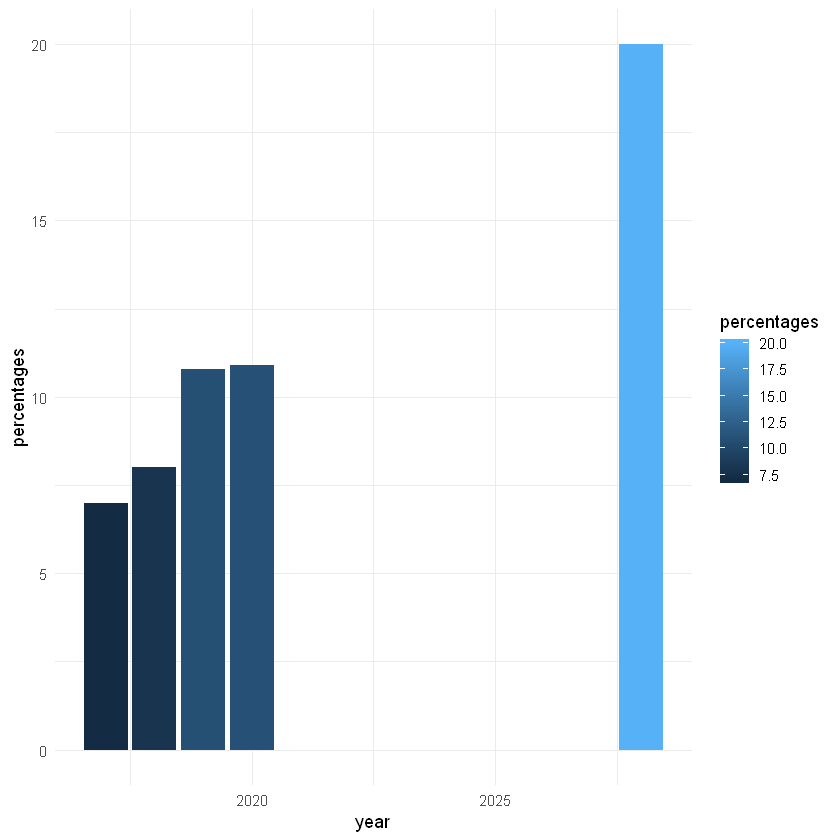

In [40]:
pd = data.frame(year=c(2017, 2018, 2019, 2020, 2028), percentages=c(7, 8, 10.8, 10.9, 20))
library(ggplot2)
plot = ggplot(pd, aes(x=year, y=percentages, fill=percentages)) + geom_bar(stat='identity') + theme_minimal()
plot

### Cleaning the Data to remove whitespaces

In [7]:
df$Mission_Acronym <- trimws(df$Mission_Acronym, which = c("both"))

### Write a function that takes as input a country’s ISO code and returns (in any nice-looking format):
(a) a list of all the unique missions that the country has sent personnel to for the whole timeline of the dataset 


(b) the number of unique missions that the country has sent personnel to for the whole timeline of the dataset 

In [33]:
h = df
namesandnumbers <- function(b) {
    subset = h[h$ISOCode3==b,]
    unique = unique(subset[c("Mission_Acronym")])
    unique_list <- list(unique$Mission_Acronym)
    print("All unique missions this country has contributed to:")
    print(unique_list)
    no <- length(unique_list[[1]])
    print(paste("number of unique missions:", no))
}
namesandnumbers("EGY")

[1] "All unique missions this country has contributed to:"
[[1]]
 [1] "MINURSO"  "MINUSCA"  "MINUSMA"  "MONUSCO"  "UNAMID"   "UNISFA"  
 [7] "UNMISS"   "UNSOM"    "UNMIL"    "UNOCI"    "MINUSTAH" "UNAMI"   
[13] "UNMIT"    "UNSMIS"   "UNMIS"    "UNMIN"    "MINURCAT" "MONUC"   
[19] "UNMIK"    "UNMISET"  "UNMIBH"  

[1] "number of unique missions: 21"


### Create a loop that cycles through each of the Minerva rotation countries’ ISO codes and reports back the results of the function above. 

In [38]:
Minerva_countries <- list("USA", "KOR", "IND", "DEU", "ARG", "GBR")
for (i in Minerva_countries) {
    print(i)
    namesandnumbers(i)
}

[1] "USA"
[1] "All unique missions this country has contributed to:"
[[1]]
 [1] "BINUH"     "MINUSCA"   "MINUSMA"   "MONUSCO"   "UNMISS"    "UNSMIL"   
 [7] "UNTSO"     "MINUJUSTH" "UNMIL"     "MINUSTAH"  "UNAMA"     "MINURCAT" 
[13] "UNMIS"     "UNMIK"     "UNIOSIL"   "UNAMID"    "UNMIT"     "UNOTIL"   
[19] "UNAMSIL"   "UNMISET"   "UNIKOM"    "UNMEE"     "UNMIBH"   

[1] "number of unique missions: 23"
[1] "KOR"
[1] "All unique missions this country has contributed to:"
[[1]]
 [1] "MINURSO"   "UNAMID"    "UNIFIL"    "UNMISS"    "UNMOGIP"   "UNMHA"    
 [7] "MINUJUSTH" "UNMIL"     "UNOCI"     "MINUSTAH"  "UNMIT"     "UNISFA"   
[13] "UNMIS"     "UNMIN"     "UNAMA"     "UNMISET"   "UNFICYP"  

[1] "number of unique missions: 17"
[1] "IND"
[1] "All unique missions this country has contributed to:"
[[1]]
 [1] "MINURSO"   "MONUSCO"   "UNDOF"     "UNFICYP"   "UNIFIL"    "UNISFA"   
 [7] "UNMISS"    "UNTSO"     "UNSOM"     "MINUJUSTH" "MINUSTAH"  "UNMIL"    
[13] "UNAMA"     "UNOCI"     "UN

### Conclusion

In conclusion, we see that the countries with the most trained and biggest armies contribute the most to these peacekeeping missions e.g. India, Great Britian, and the US. However, countries like Rwanda and many other countries which do not have facilities or are third-world countries do not contribute to these missions probably because they do not have facilities to train female personnel or in the case of Rwanda, are in the middle of a war.

Moreover, due to the Covid-19 pandemic, the growth has also slowed down as many countries are making use of their military personnel in order to ensure quarantine and avoid unrest in the country in times of despair.

A good policy could be to do several case studies on the countries with the lowest contribution percentages and find out the root causes and handle it on a case to case basis e.g. providing funding for countries that do not have facilities to train female personnel or if a country is going through tough times like civil war or territorial dispute, handle the issue at an international level in order to meet the expectations as soon as possible.